# Model Description

A dissipation model was developed at the microcosm scale to estimate pesticide component dissipation in top-soil, i.e. degradation and leaching during infiltration. Partitioning between rainfall and runoff was determined using the Green-Ampt method (Green and Ampt, 1911; Mein and Larson, 1973). This simplification of the Richards equation (Richards, 1931) simulates overland flow when rainfall intensity overcomes the soil infiltration capacity. The retention and release of pesticide components in the top-soil was conceptualized using a mixing layer model (McGrath et al., 2008; Joyce et al., 2010). This approach assumes linear equilibrium sorption and adapts McGrath et al. (2008) by directly accounting for the leached volume such that:

$$ C(t+t_r) = C(t) \cdot exp\big( \frac{-V_{lch}}{ R~V_{H_2O} } \big) $$

$$ V_{lch} = h_{lch} \pi r^2 $$

$$ V_{H_2O} = \pi \cdot r^2 \cdot zl \cdot \theta_{sat} $$

$$ R = 1 + \frac{\rho_b K_d}{\theta_{sat}} $$

where $C$ is the concentration before $(t)$ and after $(t+ t_r)$ the leaching event, $(h_{lch})~[cm]$ is leached depth, $r~[cm]$ is the microcosm radius, $zl ~[cm]$ is the soil height and $\theta_{sat} ~ [cm^3 cm^{-3}]$ the constant volumetric water content (saturated capacity).



## Experimental set-up 

### Microcosm

In [1]:
d = (1.493 * 2)  # Diameter of falcon tube (cm)
area = ((d / 2) ** 2) * 3.1416  # (cm²)
zl = soil_height = 3.0  # Mixing layer depth in cm

### Soil Characteristics

In [2]:
''' Hydrological controlling parameters'''
# Alteck (Martine Trautmann, sampled pre-event)
pb_crop = 0.99  # bulk density (g/cm^3) 
porosity_crop = 0.61  # Crop soil
kSat_crop = 0.225  # cm/min (13.5 cm/h - Crop Soil)
ov_1 = 0.25   # Initial water content m3. m-3
ov_2 = 0.30   # Initial water content m3. m-3
ovSat_crop = 0.45  # Saturated water content (assumed)
psi_crop = 110  # soil suction Alteck
#  (Lefrancq, 2014: 61.7 cm , p.160; 110 cm, p.189)

# Results - First Pulse

## Hydrology

In [3]:
from hydroplots import *
from leach_hydrology import *

# Plot graphs within this document
%matplotlib inline 
import mpld3
mpld3.enable_notebook()

# Plot graphs outside (for interaction)
# %matplotlib

### Hydrology - Annual Crop Soil

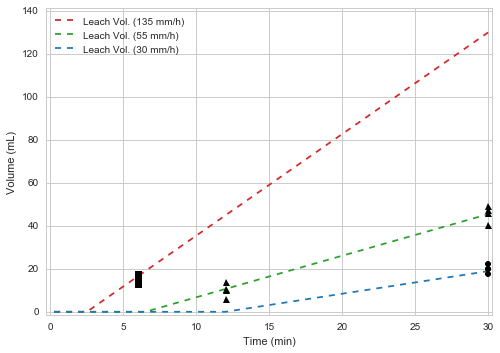

In [4]:
water_data = leachsim(ovSat=ovSat_crop,
                      kSat=kSat_crop,
                      psi=psi_crop)


cum_time_30min = water_data[:, 0]
cum_inf_135mmh = water_data[:, 4]
cum_inf_55mmh = water_data[:, 5]
cum_inf_30mmh = water_data[:, 6]
cum_leach_135mmh = water_data[:, 7]
cum_leach_55mmh = water_data[:, 8]
cum_leach_30mmh = water_data[:, 9]

data = stackdata6(cum_time_30min,
                 cum_inf_135mmh, cum_inf_55mmh, cum_inf_30mmh,
                 cum_leach_135mmh, cum_leach_55mmh, cum_leach_30mmh)

""" Observed Hydrlogy Annual Crop """
# all at 6 min, high inetnesity
leach_high_6min = np.array([16.253, 12.958, 17.536, 14.29])  

# all at 12 min, med intensity
leach_med_12min = np.array([10.089, 5.902, 13.981, 10.602]) 

# all at 30min, med intensity
leach_med_30min = np.array([49.197, 40.402, 45.772, 47.201])  

# all at 30min, low intensity
leach_low_30min = np.array([20.037, 17.508, 22.376, 20.085])  

hydroplot(data, 
          leach_high_6min, 
          leach_med_12min, leach_med_30min, 
          leach_low_30min)

### Contaminant transport - Annual Crop Soil

In [5]:
from pestmob import *

### Metalaxyl - Annual Crop Soil

In [6]:
# Initial mass
mx_ini_sterile = (1818.1+1472.7) / float(2)  
mx_ini_untreated = (1518.1+1413.3) / float(2)  

# Observed Metalaxyl Output - Crop
# high, med-12, med-30, low
mx_obs_sterile_crop = np.array([(138.1+207.1)/2.0,
                                (201.0+50.4)/2.0, (641.8+356.8)/2.0,
                                (177.0+293.5)/2.0])  
mx_obs_untreat_crop = np.array([(145.4+283.5)/2.0,
                                (158.4+262.3)/2.0, (674.9+360.2)/2.0,
                                (418.2+480.9)/2.0])

mx_sol = [mx_obs_sterile_crop, mx_obs_untreat_crop]

In [7]:
# Soil characteristics (defined above)
fom_crop_sterile = 3.87/100.0
fom_crop_untreat = 5.51/100.0
foc_crop_sterile = 0.58*fom_crop_sterile
foc_crop_untreat = 0.58*fom_crop_untreat

# Soil characteristics (OC Black & Walkley)
foc_crop_untreat2 = 2.04/100
foc_crop_sterile2 = 0.70*foc_crop_untreat2

# Pesticide Koc 
Koc_mexyl = [163.0, 50.0, 30]  # [(a) , (b), (c)] [ml/g] 

# Kd (a) - NPIC @ http://npic.orst.edu/ingred/ppdmove.htm
Kd_mexylA_crop_sterile = Koc_mexyl[0]*foc_crop_sterile  # ml/g
Kd_mexylA_crop_untreat = Koc_mexyl[0]*foc_crop_untreat

# Kd (b) - PAN @ http://www.pesticideinfo.org/
Kd_mexylB_crop_sterile = Koc_mexyl[1]*foc_crop_sterile  # ml/g
Kd_mexylB_crop_untreat = Koc_mexyl[1]*foc_crop_untreat

# Kd (c) - https://toxnet.nlm.nih.gov/cgi-bin/sis/search/a?dbs+hsdb:@term+@DOCNO+7061
Kd_mexylC_crop_sterile = Koc_mexyl[2]*foc_crop_sterile  # ml/g
Kd_mexylC_crop_untreat = Koc_mexyl[2]*foc_crop_untreat

Kd_mexyl = [Kd_mexylA_crop_sterile, Kd_mexylA_crop_untreat, 
            Kd_mexylB_crop_sterile, Kd_mexylB_crop_untreat,
            Kd_mexylC_crop_sterile, Kd_mexylC_crop_untreat]

mx_ini = [mx_ini_sterile, mx_ini_untreated]

cum_mx_crop = pest_test(Kd_mexyl,
                        pb_crop,
                        ovSat_crop,
                        water_data,
                        area, soil_height,
                        mx_ini, 
                        mx_sol)

Best log Kd (sterile):  -0.018299152865615315 ( Num:  6 ) 
 Error:  0.152820537057
Best log Kd (untreat):  -0.17173978669848897 ( Num:  5 ) 
 Error:  0.311700327855


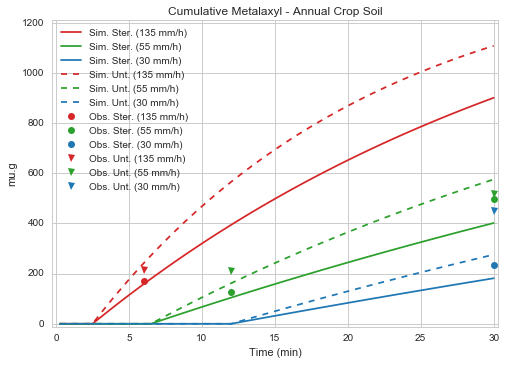

In [8]:
pestiplot(cum_mx_crop, 
          mx_obs_sterile_crop, mx_obs_untreat_crop, 
          'Cumulative Metalaxyl - Annual Crop Soil')

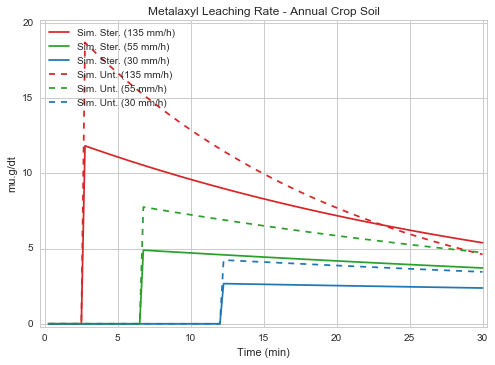

In [9]:
pestiplot_inst(cum_mx_crop, 
               mx_obs_sterile_crop, mx_obs_untreat_crop, 
               'Metalaxyl Leaching Rate - Annual Crop Soil')

### S-metolachlor - Annual Crop

In [10]:
# Initial mass, all intensities
mr_ini_sterile = (5176.9+4213.1)/float(2)  
mr_ini_untreated = (3460.8+2832.7)/float(2) 

# Observed Metolachlor Output - Crop
# high-6, med-12, med-30, low-30
mr_obs_sterile_crop = np.array([(65.7+77.7)/2.0,
                                (79.5+16.9)/2.0, (327.4+153.4)/2.0,
                                (70.9+110.7)/2.0])  
mr_obs_untreat_crop = np.array([(53.5+89.2)/2.0,
                                (49.4+70.5)/2.0, (281.7+116.4)/2.0,
                                (142.7+127.2)/2.0])

mr_ini = [mr_ini_sterile, mr_ini_untreated]
mr_sol = [mr_obs_sterile_crop, mr_obs_untreat_crop]

In [11]:
# Soil characteristics (defined above)
fom_crop_sterile = 3.87/100.0
fom_crop_untreat = 5.51/100.0
foc_crop_sterile = 0.58*fom_crop_sterile
foc_crop_untreat = 0.58*fom_crop_untreat

# Koc Ranges (EU COmmision SANCO/1426/2001 - rev. 3. 4 October 2004)
Koc_smeto = [369, 200, 110, 21]  # [ml/g]

# Kd (S-metolachlor)
Kd_smeto_crop_sterile1 = Koc_smeto[0]*foc_crop_sterile  # ml/g
Kd_smeto_crop_untreat1 = Koc_smeto[0]*foc_crop_untreat
Kd_smeto_crop_sterile2 = Koc_smeto[1]*foc_crop_sterile  # ml/g
Kd_smeto_crop_untreat2 = Koc_smeto[1]*foc_crop_untreat 
Kd_smeto_crop_sterile3 = Koc_smeto[2]*foc_crop_sterile  # ml/g
Kd_smeto_crop_untreat3 = Koc_smeto[2]*foc_crop_untreat 
Kd_smeto_crop_sterile4 = Koc_smeto[3]*foc_crop_sterile  # ml/g
Kd_smeto_crop_untreat4 = Koc_smeto[3]*foc_crop_untreat 

Kd_smeto = [Kd_smeto_crop_sterile1, Kd_smeto_crop_untreat1, 
            Kd_smeto_crop_sterile2, Kd_smeto_crop_untreat2, 
            Kd_smeto_crop_sterile3, Kd_smeto_crop_untreat3, 
            Kd_smeto_crop_sterile4, Kd_smeto_crop_untreat4]


Best log Kd (sterile):  0.3925316437400737 ( Num:  5 ) 
 Error:  0.0587203290984
Best log Kd (untreat):  0.3925316437400737 ( Num:  5 ) 
 Error:  0.288082720574


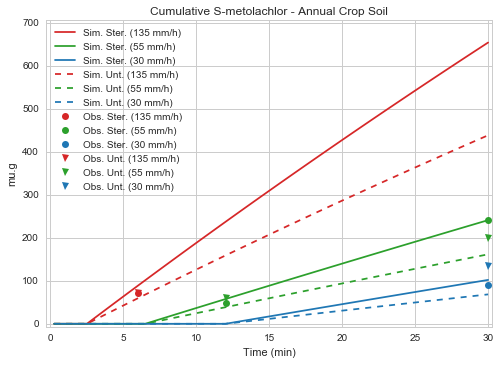

In [12]:
cum_mr_crop = pest_test(Kd_smeto,
                        pb_crop,
                        ovSat_crop,
                        water_data,
                        area, soil_height,
                        mr_ini,
                        mr_sol)

pestiplot(cum_mr_crop, 
          mr_obs_sterile_crop, mr_obs_untreat_crop, 
          'Cumulative S-metolachlor - Annual Crop Soil')


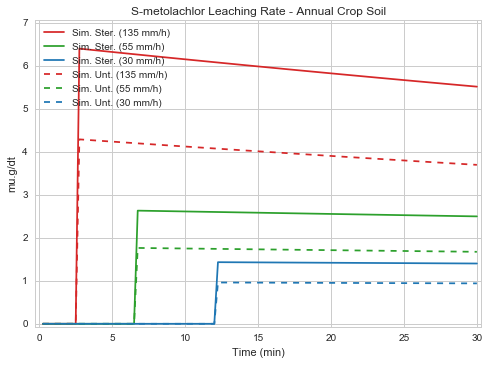

In [13]:
pestiplot_inst(cum_mr_crop, 
               mr_obs_sterile_crop, mr_obs_untreat_crop, 
               'S-metolachlor Leaching Rate - Annual Crop Soil')

### Cupper - Annual Crop

In [14]:
# Initial mass
mass_ini_sterile = (1627 + 1107) / float(2)  # all intensities:{0d, 10d)
mass_ini_untreated = (1184 + 1177) / float(2)

# Observed Cupper Output at 6min, 12min, 30min, 30min @ 135, 55, 55, 30mm/h
cu_sol_sterile = np.array([11.29, 11.63, 306.80, 21.08])
cu_sol_untreat = np.array([0.5, 1.405, 37.0, 1])

cu_ini = [mass_ini_sterile, mass_ini_untreated]
cu_sol = [cu_sol_sterile, cu_sol_untreat]

In [15]:
# Kd (Copper). Allison and Allison, 2005 - EPA/600/R-05/074: 
# log(Kd) range: 0.1 - 7.0, max-mean = 5.5

Kd_copper1 = 10**0.1  # [mL/g] = [L/Kg] 
Kd_copper2 = 10**0.5  # [mL/g] = [L/Kg] 
Kd_copper3 = 10**0.6  # [mL/g] = [L/Kg] 
Kd_copper4 = 10**1.7  # [mL/g] = [L/Kg] 
Kd_copper5 = 10**2.7  # [mL/g] = [L/Kg]

Kd_copper = [Kd_copper1, Kd_copper2, Kd_copper3, Kd_copper4, Kd_copper5]

In [16]:
cum_copper_Alteck = pest_test(Kd_copper,
                              pb_crop,
                              ovSat_crop,
                              water_data,
                              area, soil_height,
                              cu_ini,
                              cu_sol)

Best log Kd (sterile):  0.10000000000000002 ( Num:  1 ) 
 Error:  0.241514963409
Best log Kd (untreat):  0.6 ( Num:  3 ) 
 Error:  0.24781441893


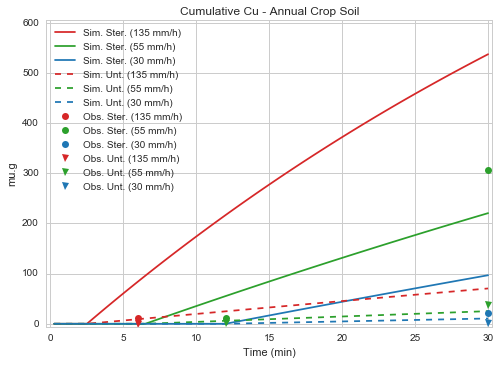

In [17]:
pestiplot(cum_copper_Alteck, 
          cu_sol_sterile, cu_sol_untreat, 
          'Cumulative Cu - Annual Crop Soil')

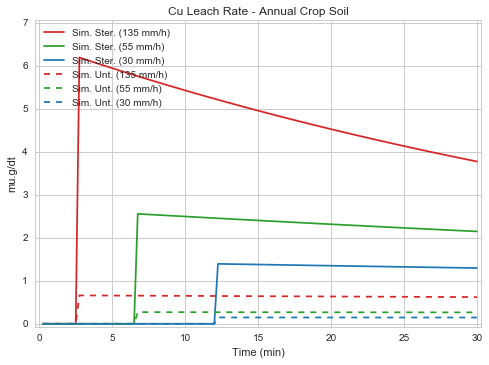

In [18]:
pestiplot_inst(cum_copper_Alteck, 
               cu_sol_sterile, cu_sol_untreat, 
               'Cu Leach Rate - Annual Crop Soil')

### Zinc - Annual Crop

In [19]:
mass_ini_sterile = (3106 + 2594) / float(2) 
mass_ini_untreated = (2636 + 2586) / float(2)

zn_ini = [mass_ini_sterile, mass_ini_untreated]

In [20]:
# Observed Zinc Output
zn_sol_sterile = np.array([17, 17, 404.25, 30.13])
zn_sol_untreat = np.array([2.19, 2, 36.85, 3.09])

zn_sol = [zn_sol_sterile, zn_sol_untreat]

In [45]:
# Kd (Zinc) Allison and Allison, 2005 - EPA/600/R-05/074:  
# log(Kd) range: 1.5 - 6.9
Kd_zinc1 = 10**0.5  # [mL/g] = [L/Kg] 
Kd_zinc2 = 10**0.8
Kd_zinc3 = 10**1.0
Kd_zinc4 = 10**1.5

Kd_zinc = [Kd_zinc1, Kd_zinc2, Kd_zinc3, Kd_zinc4]

In [46]:
cum_zinc_Alteck = pest_test(Kd_zinc,
                            pb_crop,
                            ovSat_crop,
                            water_data,
                            area, soil_height,
                            zn_ini,
                            zn_sol)

Best log Kd (sterile):  0.5 ( Num:  1 ) 
 Error:  0.402282503907
Best log Kd (untreat):  0.8 ( Num:  2 ) 
 Error:  0.240333225927


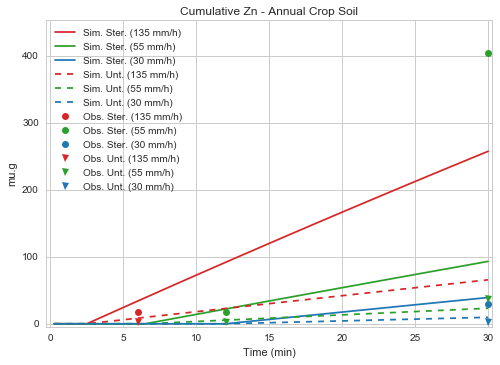

In [47]:
pestiplot(cum_zinc_Alteck, 
          zn_sol_sterile, zn_sol_untreat, 
          'Cumulative Zn - Annual Crop Soil')

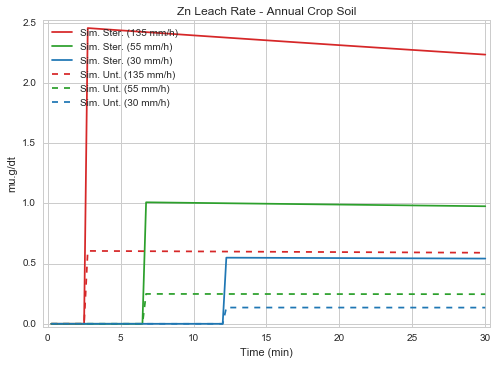

In [48]:
pestiplot_inst(cum_zinc_Alteck, 
               zn_sol_sterile, zn_sol_untreat, 
               'Zn Leach Rate - Annual Crop Soil')

## Literature parameters

### Retardation model ($K_d$)

Source: Allisson and Allison, 2005 (EPA/600/R-05/074)

| Metal (log $K_d$ [L/kg]$ | Soil/Water | Suspended Matter/ Water | Sediment/ Water | DOC/ Water |
|--------------------------|------------|-------------------------|-----------------|------------|
| Cu (mean)                | 2.7        | 4.7                     | 4.2             | 5.5        |
| Zn (mean)                | 3.1        | 5.1                     | 3.7             | 4.9        |